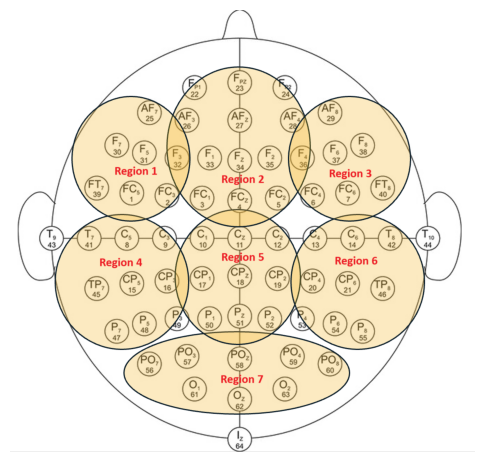

In [94]:
import imageio
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Brain regions 
br_path = r"Figures\Regions of interest.png"
br = imageio.imread(br_path)
plt.figure(figsize=(6, 6))  
plt.imshow(br)
plt.axis("off")  
plt.show()

## Number of Change Points per Region, Frequency Band, and Eye State

In [95]:
# Path to the data containing Arnaud summary
hyper_param = "windowLen500-Welch4"
file_path = "Output/" + hyper_param +".csv"
df = pd.read_csv(file_path,dtype={"subject": str})

df.head()

,subject,region,epoch,eyeState,nCp_delta,nCp_theta,nCp_alpha,nCp_beta_smr,nCp_beta,nCp_gamma
0,010002,1,1,1,0,3,0,1,0,1
1,010002,2,1,1,0,6,5,4,4,3
2,010002,3,1,1,2,9,5,9,1,7
3,010002,4,1,1,4,4,0,0,0,0
4,010002,5,1,1,0,1,1,2,0,0


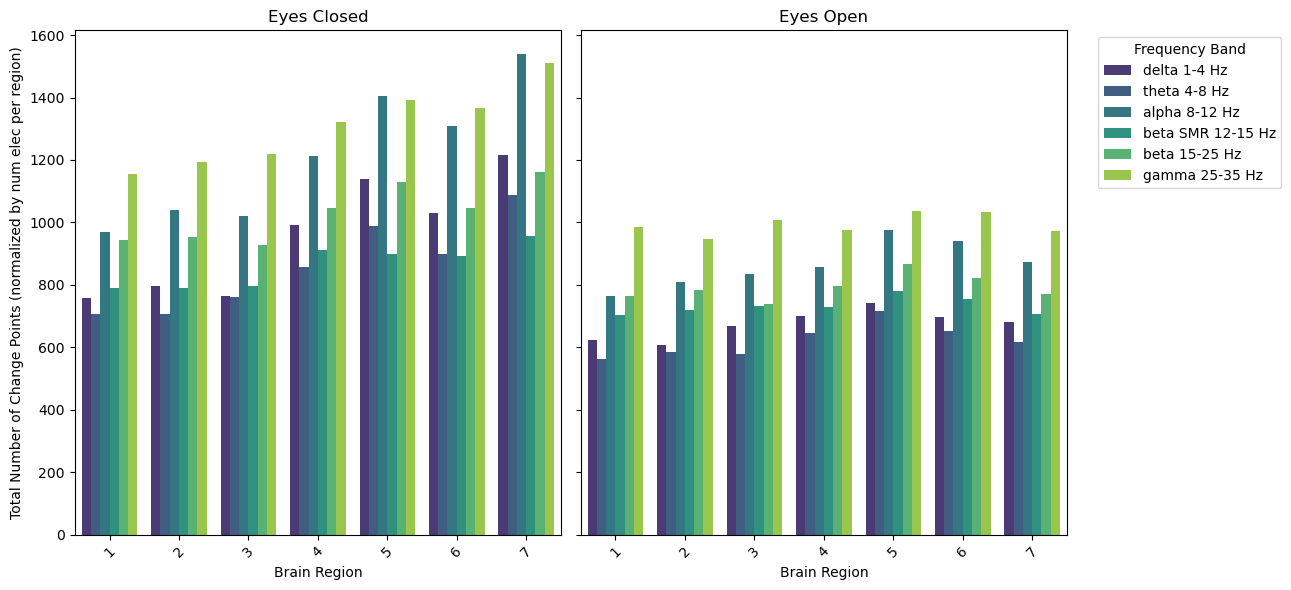

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

freq_bands = ["nCp_delta", "nCp_theta", "nCp_alpha", "nCp_beta_smr", "nCp_beta", "nCp_gamma"]
num_elec_per_region = [7, 10, 7, 9, 9, 9, 10]
subjects_ids = list(df["subject"].unique())

# Function to process data
def preprocess_data(eye_state, signle_subject = False, subject_id = 0):
    if signle_subject:
        df_region_grouped = df[(df["eyeState"] == eye_state) & (df["subject"] == subjects_ids[subject_id])].groupby("region")[freq_bands[0:6]].sum().reset_index()
    else:
        df_region_grouped = df[df["eyeState"] == eye_state].groupby("region")[freq_bands[0:6]].sum().reset_index()

    
    
    # Normalize change points by number of electrodes
    for i in range(7):
        df_region_grouped.iloc[i, 1:] /= num_elec_per_region[i]

    # Melt for plotting
    return df_region_grouped.melt(id_vars=["region"], var_name="Frequency Band", value_name="Change Points")

# Prepare data for eyes closed (0) and eyes open (1)
df_closed = preprocess_data(0)
df_open = preprocess_data(1)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(13, 6), sharey=True)

# Eyes-closed condition (left plot, no legend)
sns.barplot(x="region", y="Change Points", hue="Frequency Band", data=df_closed, palette="viridis", ax=axes[0])
axes[0].set_title("Eyes Closed")
axes[0].set_xlabel("Brain Region")
axes[0].set_ylabel("Total Number of Change Points (normalized by num elec per region)")
axes[0].tick_params(axis="x", rotation=45)
axes[0].legend_.remove()  # Remove legend from the left plot

# Eyes-open condition (right plot, with legend)
sns.barplot(x="region", y="Change Points", hue="Frequency Band", data=df_open, palette="viridis", ax=axes[1])
axes[1].set_title("Eyes Open")
axes[1].set_xlabel("Brain Region")
axes[1].tick_params(axis="x", rotation=45)

# Place the legend outside the right plot
handles, labels = axes[1].get_legend_handles_labels()
labels = ["delta 1-4 Hz","theta 4-8 Hz", "alpha 8-12 Hz", "beta SMR 12-15 Hz", "beta 15-25 Hz", "gamma 25-35 Hz"]
axes[1].legend(handles, labels, title="Frequency Band", bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout and show
plt.tight_layout()
# Save the plot as a PNG file
plt.savefig("Figures/num CP per region and frequency band"+ hyper_param+".png", dpi=300, bbox_inches="tight")
plt.show()

#### Same figure for a signle subject 

In [97]:
subject_num = 0 # subject range from 0-199
def plot_ncp_signle_subject(subject_num=0):
    df_closed = preprocess_data(0, signle_subject=True, subject_id=subject_num)
    df_open = preprocess_data(1, signle_subject=True, subject_id=subject_num)

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    # Eyes-closed condition (left plot, no legend)
    sns.barplot(x="region", y="Change Points", hue="Frequency Band", data=df_closed, palette="viridis", ax=axes[0])
    axes[0].set_title("Eyes Closed")
    axes[0].set_xlabel("Brain Region")
    axes[0].set_ylabel("Total Number of Change Points (normalized by num elec per region)")
    axes[0].tick_params(axis="x", rotation=45)
    axes[0].legend_.remove()  # Remove legend from the left plot

    # Eyes-open condition (right plot, with legend)
    sns.barplot(x="region", y="Change Points", hue="Frequency Band", data=df_open, palette="viridis", ax=axes[1])
    axes[1].set_title("Eyes Open")
    axes[1].set_xlabel("Brain Region")
    axes[1].tick_params(axis="x", rotation=45)

    # Place the legend outside the right plot
    handles, labels = axes[1].get_legend_handles_labels()
    labels = ["delta 1-4 Hz","theta 4-8 Hz", "alpha 8-12 Hz", "beta SMR 12-15 Hz", "beta 15-25 Hz", "gamma 25-50 Hz"]
    axes[1].legend(handles, labels, title="Frequency Band", bbox_to_anchor=(1.05, 1), loc="upper left")

    # Adjust layout and show
    plt.tight_layout()
    plt.show()

In [98]:
# plot_ncp_signle_subject(subject_num=2)

## Number of change points per epoch 

In [99]:
df_delta = df[["subject", "region", "epoch", "eyeState", "nCp_delta"]]
df_delta.rename(columns={'nCp_delta': 'nbrCp'}, inplace=True)

df_theta = df[["subject", "region", "epoch", "eyeState", "nCp_theta"]]
df_theta.rename(columns={'nCp_theta': 'nbrCp'}, inplace=True)

df_alpha = df[["subject", "region", "epoch", "eyeState", "nCp_alpha"]]
df_alpha.rename(columns={'nCp_alpha': 'nbrCp'}, inplace=True)

df_beta_smr = df[["subject", "region", "epoch", "eyeState", "nCp_beta_smr"]]
df_beta_smr.rename(columns={'nCp_beta_smr': 'nbrCp'}, inplace=True)

df_beta = df[["subject", "region", "epoch", "eyeState", "nCp_beta"]]
df_beta.rename(columns={'nCp_beta': 'nbrCp'}, inplace=True)

df_gamma = df[["subject", "region", "epoch", "eyeState", "nCp_gamma"]]
df_gamma.rename(columns={'nCp_gamma': 'nbrCp'}, inplace=True)

In [100]:
def plot_ncp_per_epoch(freq_band="theta"):
    # Ensure correct if-elif structure
    if freq_band == "delta":
        df = df_delta
    elif freq_band == "theta":
        df = df_theta
    elif freq_band == "alpha":
        df = df_alpha
    elif freq_band == "beta_smr":
        df = df_beta_smr
    elif freq_band == "beta":
        df = df_beta 
    elif freq_band == "gamma":
        df = df_gamma
    else: 
        raise ValueError("Invalid freq_band: choose from delta, theta, alpha, beta_smr, beta, gamma")  # Fixed typo

    # Ensure each subject has all 8 epochs
    valid_subjects = df.groupby("subject")["epoch"].nunique()
    valid_subjects = valid_subjects[valid_subjects == 8].index

    df_filtered = df[df["subject"].isin(valid_subjects)]

    # Compute the average nbrCp per region, epoch, and eyeState
    df_avg = df_filtered.groupby(["region", "epoch", "eyeState"])["nbrCp"].mean().reset_index()

    # Define colors for eye state
    eye_colors = {0: "red", 1: "blue"}

    # Create the plot
    plt.figure(figsize=(7, 4))
    sns.lineplot(
        data=df_avg,
        x="epoch",
        y="nbrCp",
        hue="eyeState",
        style="eyeState",
        palette=eye_colors,
        markers=True,
        dashes=False
    )

    # Customize the plot
    plt.title(f"Average num CP for {freq_band.capitalize()} freq band across epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Average nbrCp")

    # Fix legend labels
    legend_labels = {0: "Closed", 1: "Open"}
    handles, _ = plt.gca().get_legend_handles_labels()
    plt.legend(handles, [legend_labels[int(label)] for label in eye_colors.keys()], 
               title="Eye State", loc="upper left")

    plt.xticks(range(1, 9))  # Ensure ticks are at integer epochs
    plt.grid(True)

    # Save the plot before showing it
    plt.savefig(f"Figures/Avg_num_CP_{freq_band}" + hyper_param + ".png", dpi=300, bbox_inches="tight")
    
    # Show the plot
    plt.show()

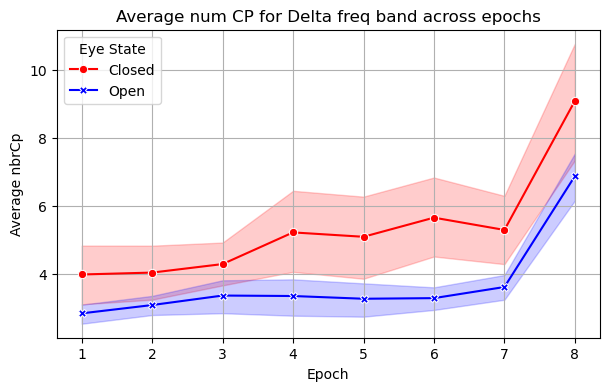

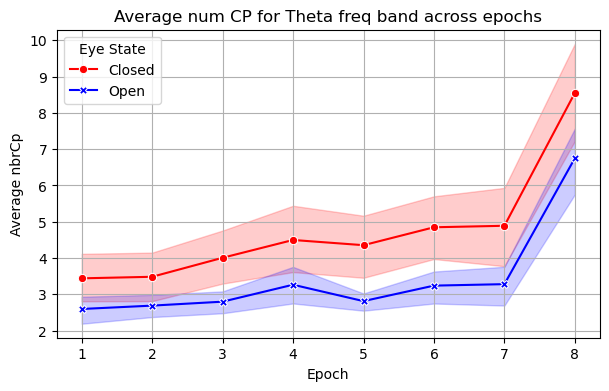

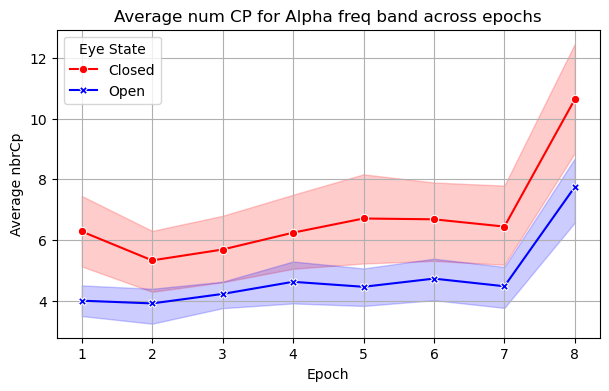

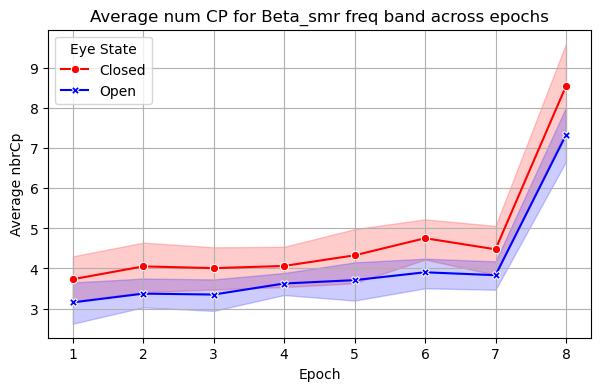

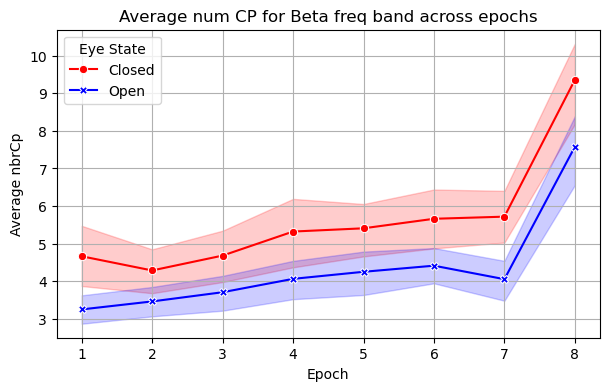

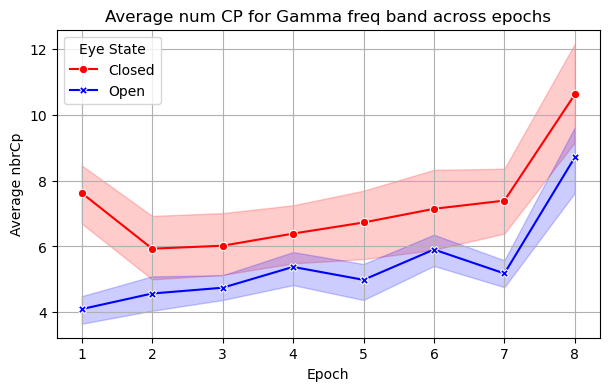

In [101]:
# values in : theta, alpha, beta_smr, beta, gamma
plot_ncp_per_epoch(freq_band = "delta")
plot_ncp_per_epoch(freq_band = "theta")
plot_ncp_per_epoch(freq_band = "alpha")
plot_ncp_per_epoch(freq_band = "beta_smr")
plot_ncp_per_epoch(freq_band = "beta")
plot_ncp_per_epoch(freq_band = "gamma")

#### Number of change points per epoch, frequenct band and region 

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_nbr_cp_per_epochRegion(freq_band="theta"):
    if freq_band == "delta":
        df = df_delta
    elif freq_band == "theta":
        df = df_theta
    elif freq_band == "alpha":
        df = df_alpha
    elif freq_band == "beta_smr":
        df = df_beta_smr
    elif freq_band == "beta":
        df = df_beta 
    elif freq_band == "gamma":
        df = df_gamma
    else: 
        raise ValueError("Invalid freq_band: choose from theta, alpha, beta_smr, beta, gamma")
        
    valid_subjects = df.groupby("subject")["epoch"].nunique()
    valid_subjects = valid_subjects[valid_subjects == 8].index

    df_filtered = df[df["subject"].isin(valid_subjects)]

    # Define colors for eye state
    eye_colors = {0: "red", 1: "blue"}
    legend_labels = {0: "Closed", 1: "Open"}

    # Get unique regions and define subplot grid
    regions = sorted(df_filtered["region"].unique())  # Ensure consistent order
    num_regions = len(regions)
    fig, axes = plt.subplots(3, 3, figsize=(10, 6), sharex=True, sharey=True)
    
    # Add a title with the frequency band
    fig.suptitle(f"Number of Change Points per Epoch and Region - {freq_band.upper()} Band", 
                fontsize=16, y=1.08)

    # Flatten axes for easy indexing
    axes = axes.flatten()

    # Plot each region in a separate subplot
    for i, region in enumerate(regions):
        ax = axes[i]
        
        # Filter data for this region
        region_data = df_filtered[df_filtered["region"] == region]
        
        # Plot the lines
        sns.lineplot(
            data=region_data,
            x="epoch",
            y="nbrCp",
            hue="eyeState",
            style="eyeState",
            palette=eye_colors,
            markers=True,
            dashes=False,
            ax=ax,
            ci=95  # Default 95% confidence interval
        )
        
        # Remove individual legends
        ax.legend_.remove()
        
        # Customize subplot
        ax.set_title(f"Region {region}")
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Average nbrCp")
        ax.set_xticks(range(1, 9))  # Ensure ticks are at integer epochs
        ax.grid(True)

    # Remove empty subplots (if regions < 9)
    for i in range(num_regions, 9):
        fig.delaxes(axes[i])

    # Create a **single** legend for all subplots
    handles = [plt.Line2D([0], [0], color=color, marker='o', linestyle='-', label=legend_labels[state]) 
               for state, color in eye_colors.items()]
    fig.legend(handles=handles, title="Eye State", loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=2)
    
    # Adjust layout
    plt.tight_layout()
    
    # save the figure 
    plt.savefig(f"Figures/NumCp per epoch and region - {freq_band}" + hyper_param + ".png", 
               dpi=300, bbox_inches="tight")
    
    plt.show()

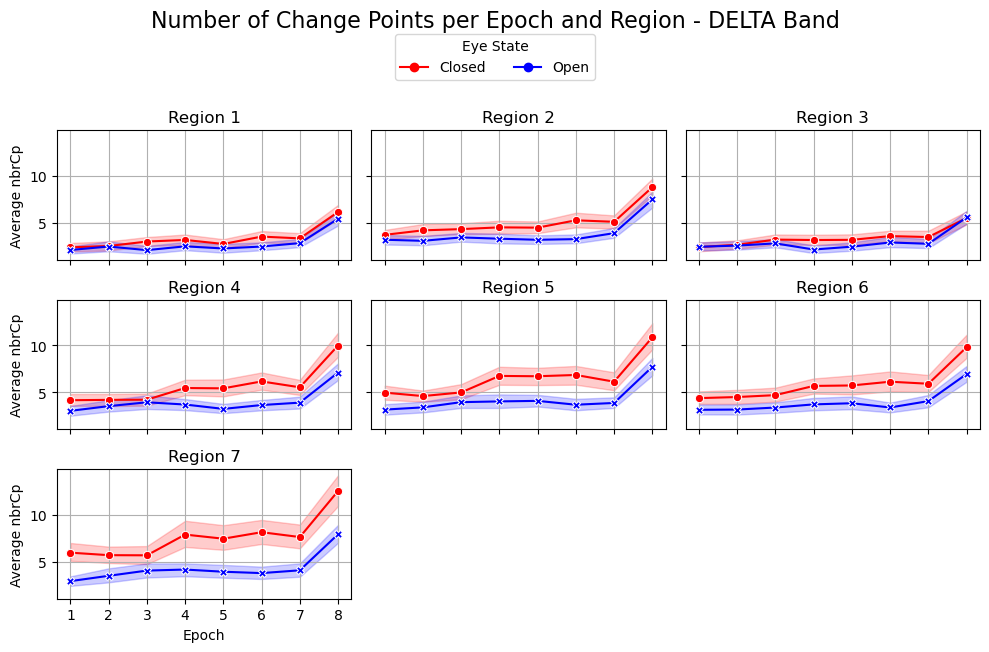

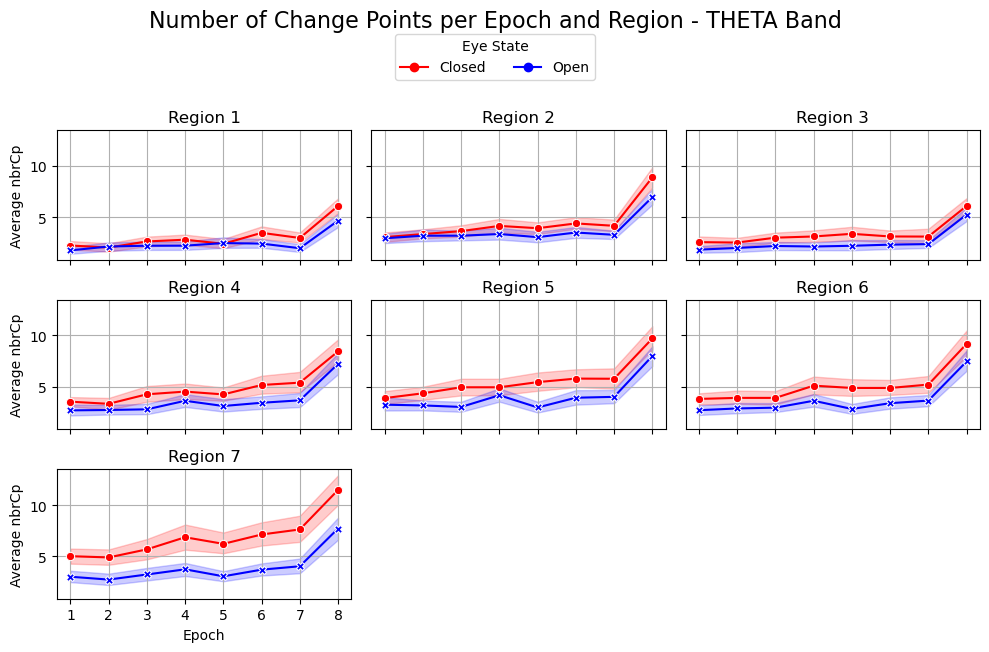

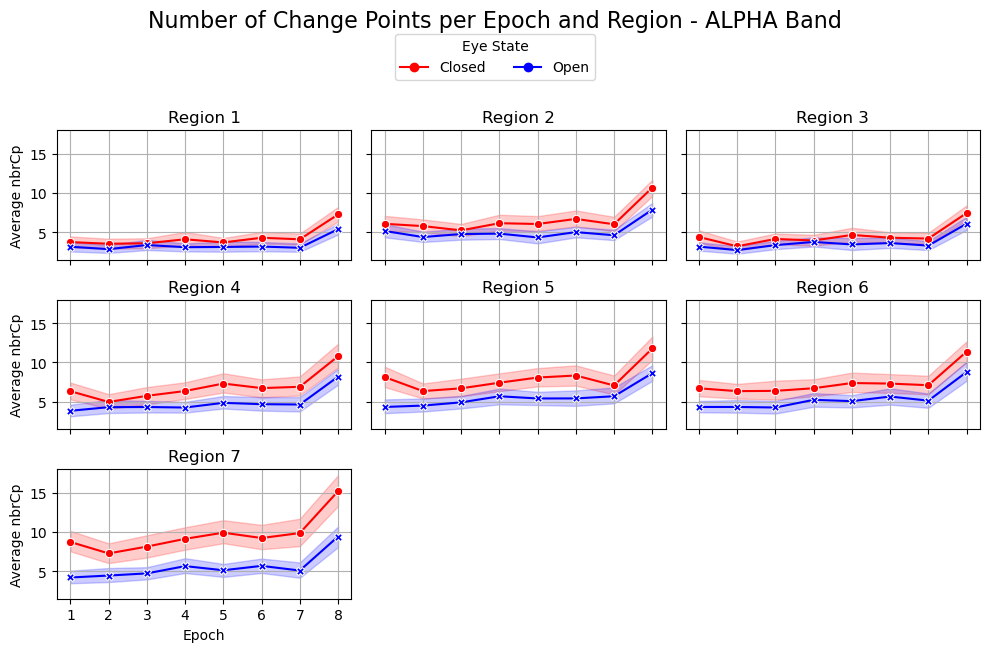

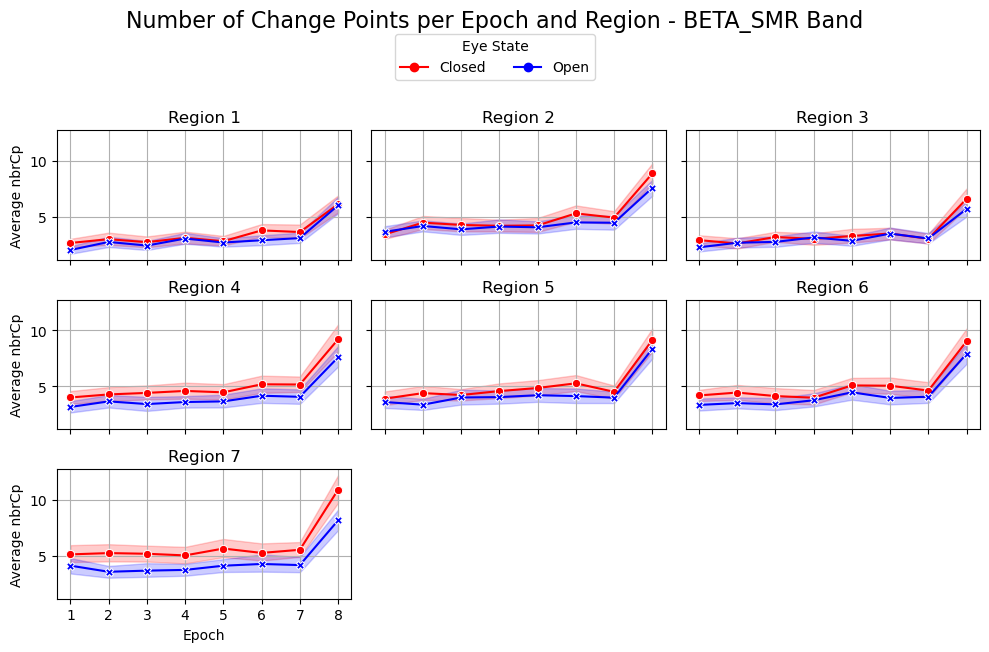

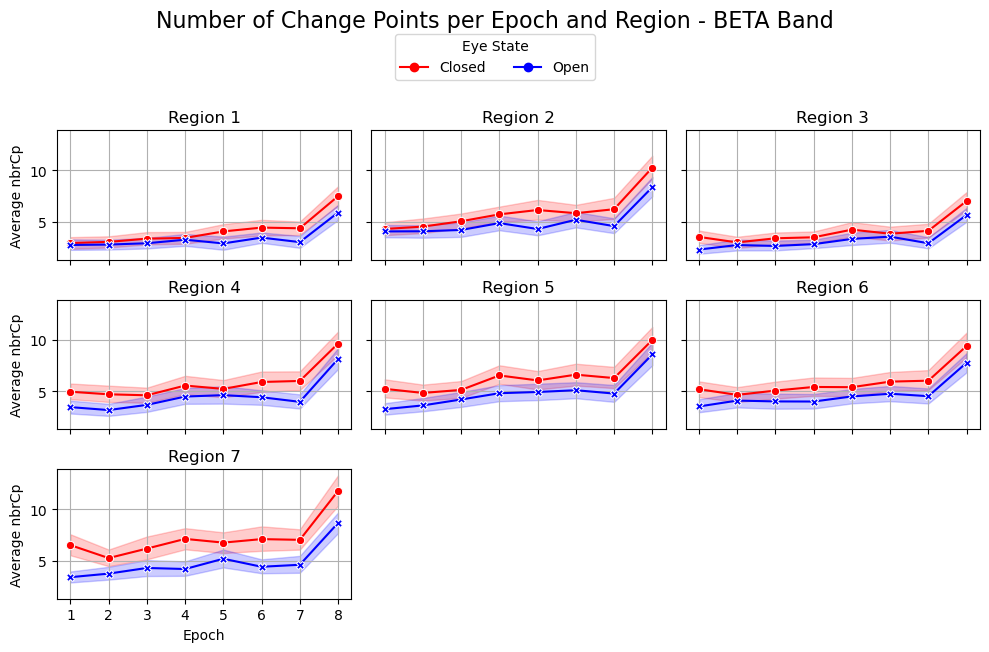

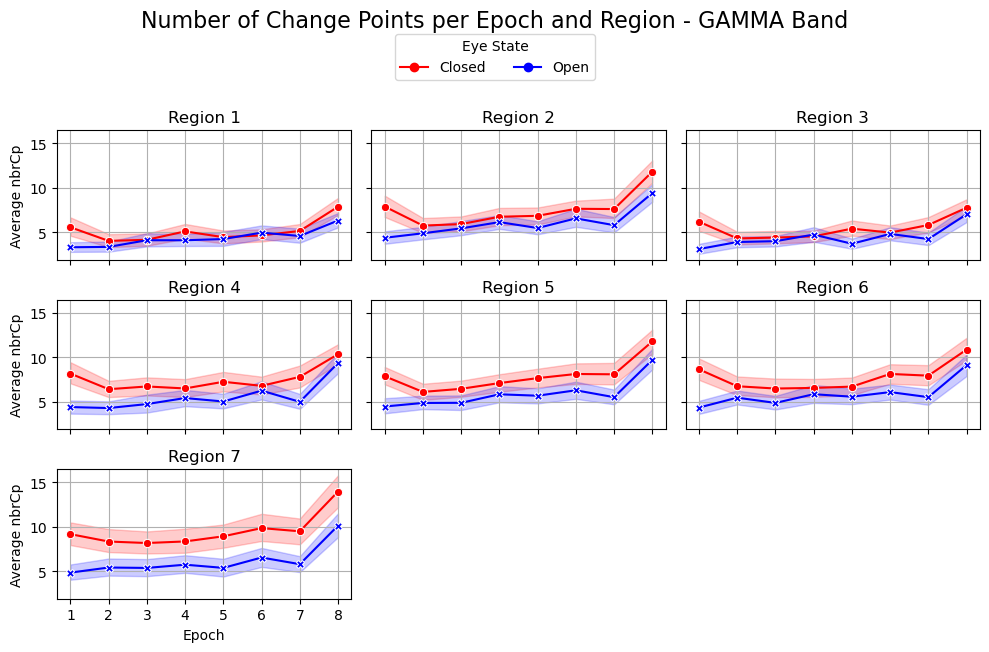

In [103]:
plot_nbr_cp_per_epochRegion(freq_band = "delta")
plot_nbr_cp_per_epochRegion(freq_band = "theta")
plot_nbr_cp_per_epochRegion(freq_band = "alpha")
plot_nbr_cp_per_epochRegion(freq_band = "beta_smr")
plot_nbr_cp_per_epochRegion(freq_band = "beta")
plot_nbr_cp_per_epochRegion(freq_band = "gamma")